# Balanced network implementation
Following [Van Vreeswijk, Carl, and Haim Sompolinsky. "Chaos in neuronal networks with balanced excitatory and inhibitory activity." Science 274.5293 (1996): 1724-1726.](https://scholar.google.co.za/scholar?hl=en&as_sdt=0%2C5&q=van+vreeswijk+sompolinsky+1996&btnG=)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def set_font_size(ax, font_size, legend_font_size=None):
    """Set fontsize of all axis text objects to specified value."""

    texts = ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels())

    for text in texts:
        text.set_fontsize(font_size)

    if legend_font_size is None:
        legend_font_size = font_size

    legend = ax.get_legend()

    if legend:
        for text in legend.get_texts():
            text.set_fontsize(legend_font_size)

## Set params and make weight matrices

In [2]:
N_E = 4000
N_I = 1000
N_U = 1000
N = N_E + N_I

K = 500
V_TH = np.sqrt(K)

# make input weights
## to E from U
w_eu = np.zeros((N_E, N_U))

for i in range(N_E):
    idxs = np.random.permutation(N_U)[:K]
    w_eu[i, idxs] = 1

## to I from U
w_iu = np.zeros((N_I, N_U))

for i in range(N_I):
    idxs = np.random.permutation(N_U)[:K]
    w_iu[i, idxs] = 1

# make recurrent weights
## to E from E
w_ee = np.zeros((N_E, N_E))
for i in range(N_E):
    idxs = np.random.permutation(N_E)[:K]
    w_ee[i, idxs] = 1
    
## to E from I
w_ei = np.zeros((N_E, N_I))
for i in range(N_E):
    idxs = np.random.permutation(N_I)[:K]
    w_ei[i, idxs] = -1

## to I from E
w_ie = np.zeros((N_I, N_E))
for i in range(N_I):
    idxs = np.random.permutation(N_E)[:K]
    w_ie[i, idxs] = 1

## to I from I
w_ii = np.zeros((N_I, N_I))
for i in range(N_I):
    idxs = np.random.permutation(N_I)[:K]
    w_ii[i, idxs] = -1

### Plot weight matrices

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


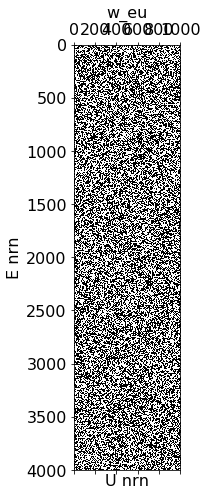

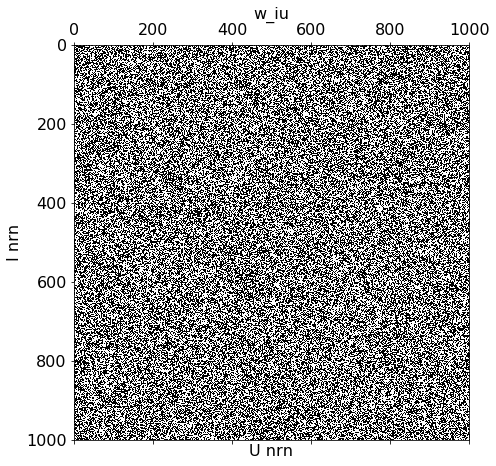

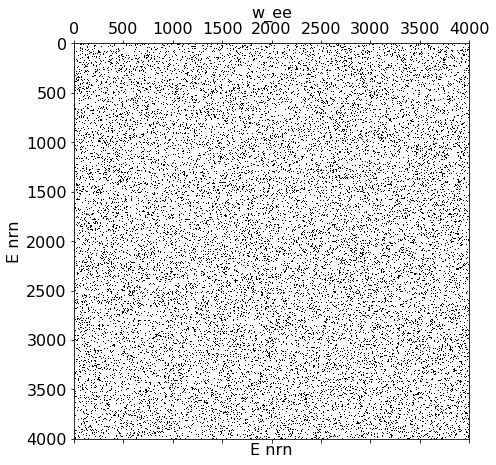

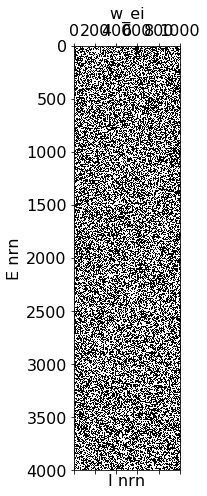

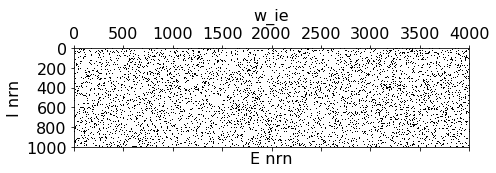

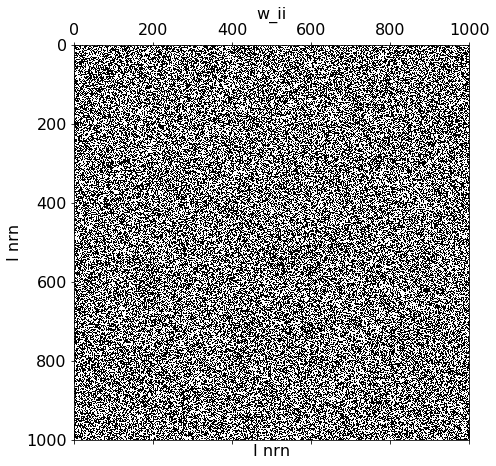

In [3]:
axs = []
fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_eu)
ax.set_ylabel('E nrn')
ax.set_xlabel('U nrn')
ax.set_title('w_eu')
axs.append(ax)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_iu)
ax.set_ylabel('I nrn')
ax.set_xlabel('U nrn')
ax.set_title('w_iu')
axs.append(ax)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_ee)
ax.set_ylabel('E nrn')
ax.set_xlabel('E nrn')
ax.set_title('w_ee')
axs.append(ax)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_ei)
ax.set_ylabel('E nrn')
ax.set_xlabel('I nrn')
ax.set_title('w_ei')
axs.append(ax)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_ie)
ax.set_ylabel('I nrn')
ax.set_xlabel('E nrn')
ax.set_title('w_ie\n')
axs.append(ax)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=True)
ax.spy(w_ii)
ax.set_ylabel('I nrn')
ax.set_xlabel('I nrn')
ax.set_title('w_ii')
axs.append(ax)

for ax in axs:
    set_font_size(ax, 16)

## Run dynamics

In [4]:
t = np.arange(500)

# inputs to E & I nrns
v_e = np.zeros((N_E, len(t)))
v_i = np.zeros((N_I, len(t)))

# spikes
s_e = np.zeros((N_E, len(t)))
s_i = np.zeros((N_I, len(t)))

# initial spikes
s_e[:, 0] = (np.random.rand(N_E) < 0.5).astype(float)
s_i[:, 0] = (np.random.rand(N_I) < 0.5).astype(float)

# external inputs
u = .04*np.ones((N_U, 1))

# dynamics
for t_ in t[1:]:
    # get inputs
    v_e[:, [t_]] = w_ee.dot(s_e[:, [t_-1]]) + w_ei.dot(s_i[:, [t_-1]]) + w_eu.dot(u)
    v_i[:, [t_]] = w_ie.dot(s_e[:, [t_-1]]) + w_ii.dot(s_i[:, [t_-1]]) + w_iu.dot(u)
    
    # threshold inputs to make spikes
    s_e[:, [t_]] = (v_e[:, [t_]] > V_TH).astype(float)
    s_i[:, [t_]] = (v_i[:, [t_]] > V_TH).astype(float)

# all inputs and spikes
v = np.concatenate([v_e, v_i], axis=0)
s = np.concatenate([s_e, s_i], axis=0)

## Plot dynamics

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


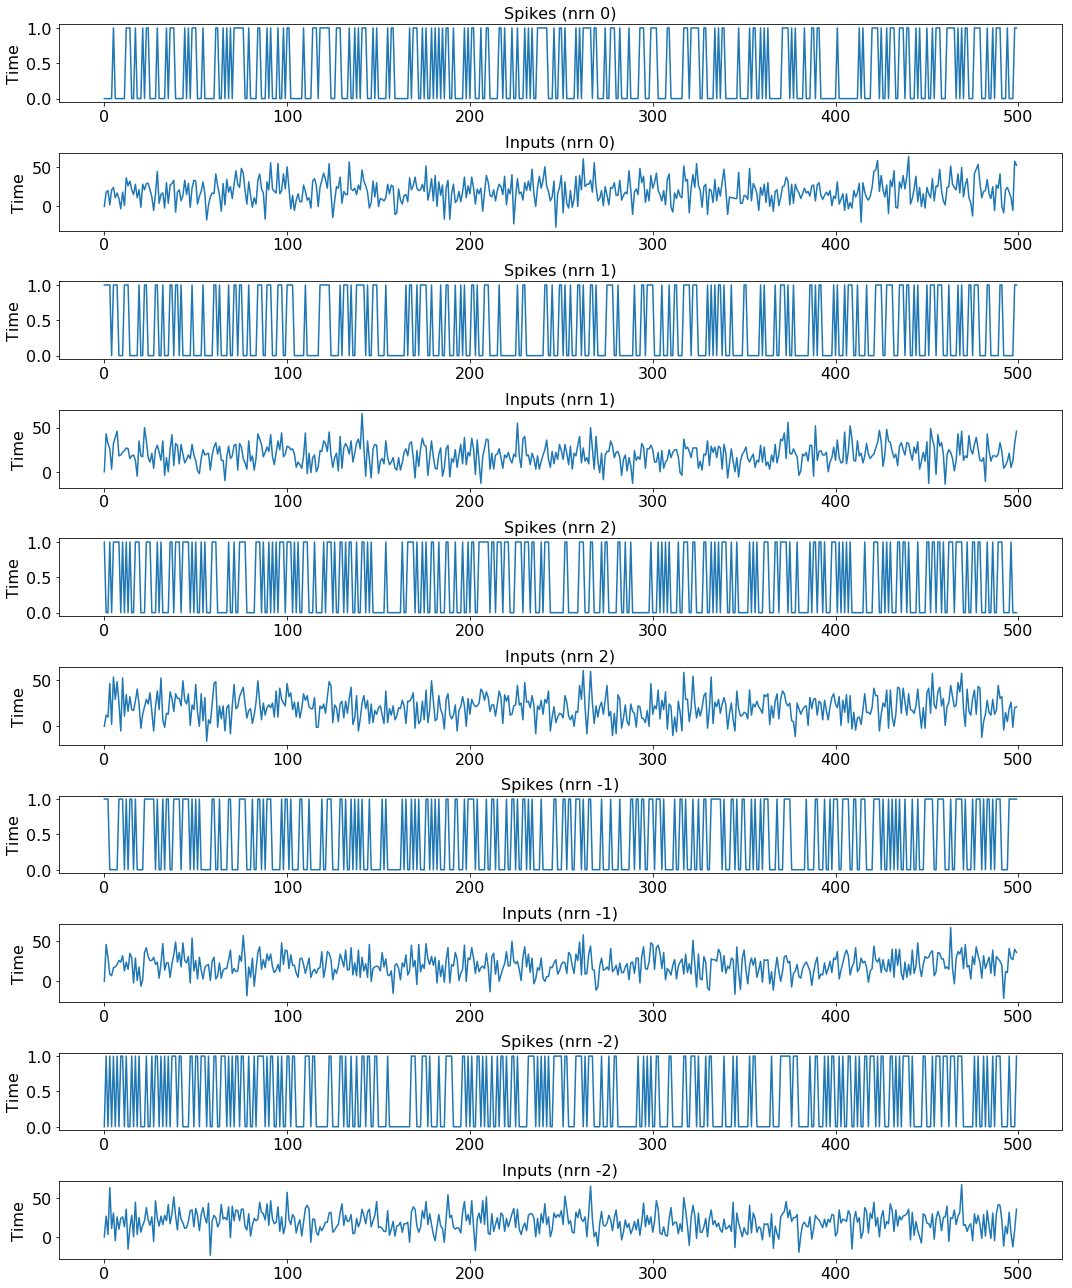

In [5]:
fig, axs = plt.subplots(10, 1, figsize=(15, 18), tight_layout=True)
# spikes and inputs for several cells
axs[0].plot(s[0])
axs[0].set_title('Spikes (nrn 0)')
axs[1].plot(v[0])
axs[1].set_title('Inputs (nrn 0)')
axs[2].plot(s[1])
axs[2].set_title('Spikes (nrn 1)')
axs[3].plot(v[1])
axs[3].set_title('Inputs (nrn 1)')
axs[4].plot(s[2])
axs[4].set_title('Spikes (nrn 2)')
axs[5].plot(v[2])
axs[5].set_title('Inputs (nrn 2)')
axs[6].plot(s[-1])
axs[6].set_title('Spikes (nrn -1)')
axs[7].plot(v[-1])
axs[7].set_title('Inputs (nrn -1)')
axs[8].plot(s[-2])
axs[8].set_title('Spikes (nrn -2)')
axs[9].plot(v[-2])
axs[9].set_title('Inputs (nrn -2)')

for ax in axs:
    ax.set_ylabel('Time')
    set_font_size(ax, 16)